# Project :-  Exploratory Data Analysis (EDA) on Retail Sales Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns

In [110]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [111]:
df.shape

(1000, 9)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Checking any duplicates in data

In [113]:
df.duplicated().any()

False

Finding NaN values in the dataset

In [114]:
df.isna().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [115]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Checking Unique Values

In [116]:
for i in df.columns.to_list():
    print(f'No of unique values in {i} => {df[i].nunique()}.')

No of unique values in Transaction ID => 1000.
No of unique values in Date => 345.
No of unique values in Customer ID => 1000.
No of unique values in Gender => 2.
No of unique values in Age => 47.
No of unique values in Product Category => 3.
No of unique values in Quantity => 4.
No of unique values in Price per Unit => 5.
No of unique values in Total Amount => 18.


In [117]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [118]:
df.columns = df.columns.str.replace(' ','_')

In [119]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

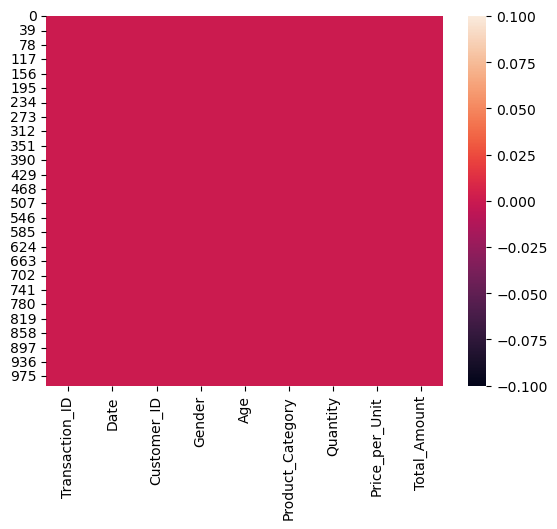

In [120]:
sns.heatmap(df.isna());

Finding numeric columns

In [121]:
num_col = []
for col in df.columns:
    if df[col].dtypes != 'object':
        num_col.append(col)

In [122]:
num_col

['Transaction_ID', 'Age', 'Quantity', 'Price_per_Unit', 'Total_Amount']

Finding categorical columns

In [123]:
cat_col = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_col.append(col)

In [124]:
cat_col

['Date', 'Customer_ID', 'Gender', 'Product_Category']

In [125]:
df1 = df.copy()

Adding Day, Year and Month columns

In [126]:
df1['Day'] = df1['Date'].str.split('-').str[2]
df1['Year'] = df1['Date'].str.split('-').str[0]

In [127]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [128]:
df1['Month']  = df1['Date'].dt.month_name()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,2023,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2023,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,2023,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,2023,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,06,2023,May


Finding Outliers

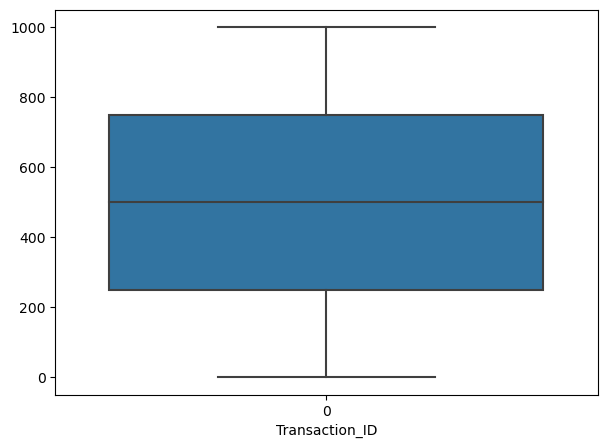

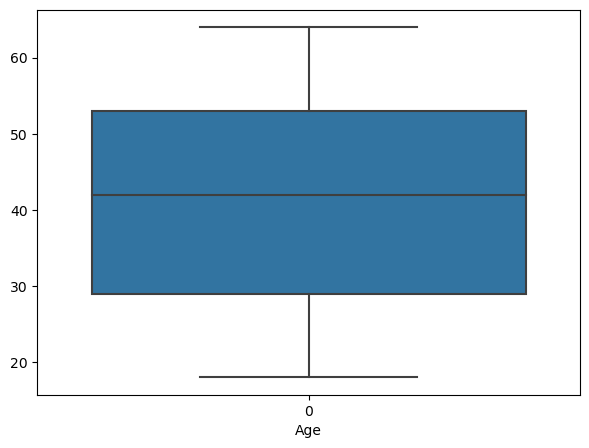

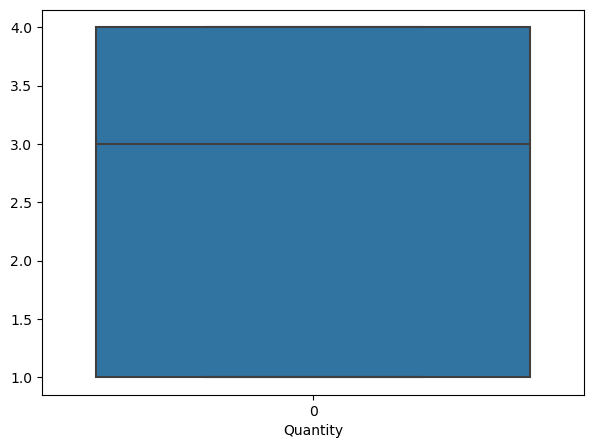

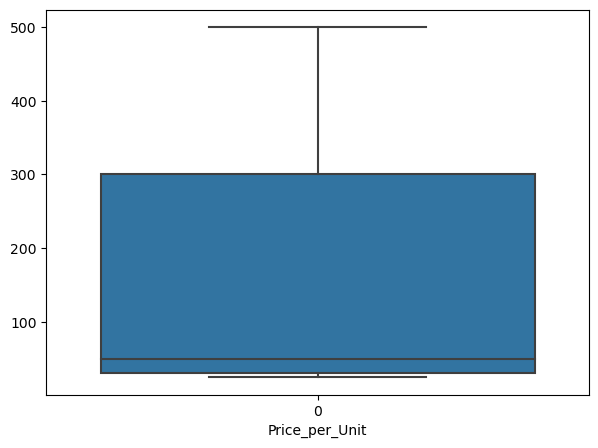

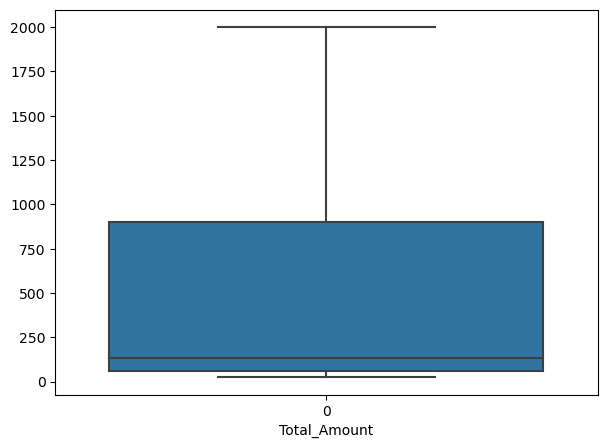

In [130]:
for col in df.select_dtypes('int').columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [131]:
# 'Total Amount' cant be less than 'Price per unit'
df1[df1.Price_per_Unit > df1.Total_Amount]

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month


Distribution of Numerical variables about Mean and Median

# EDA

Distribution of Numerical variables about Mean and Median

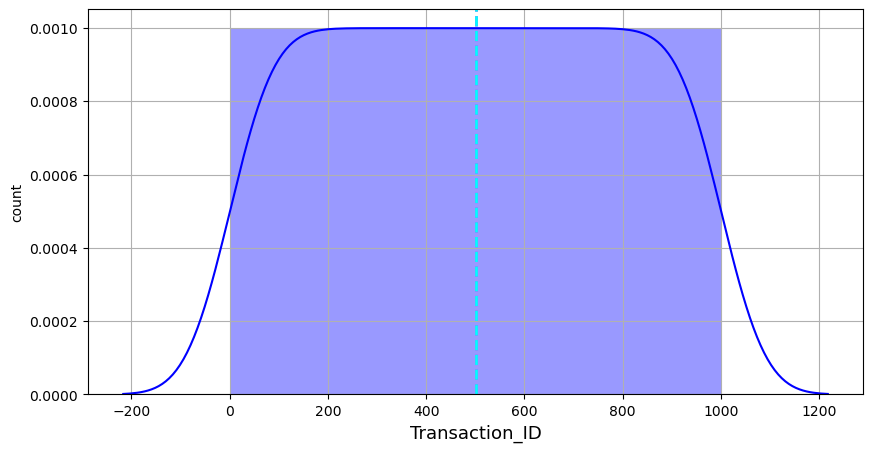

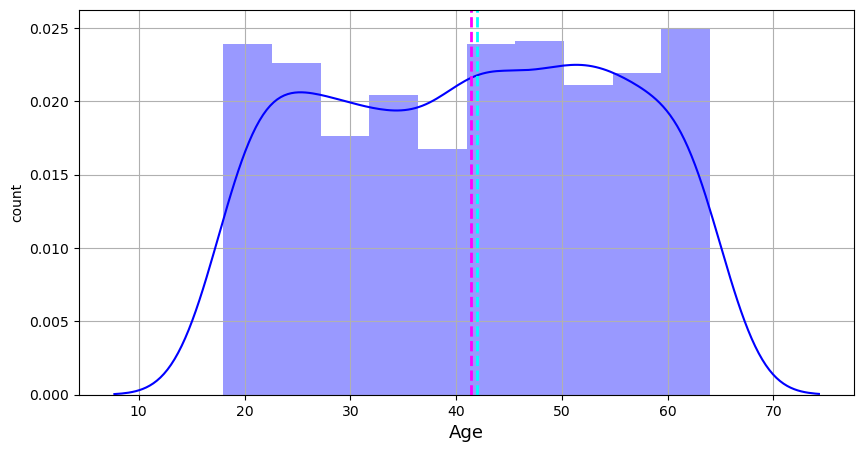

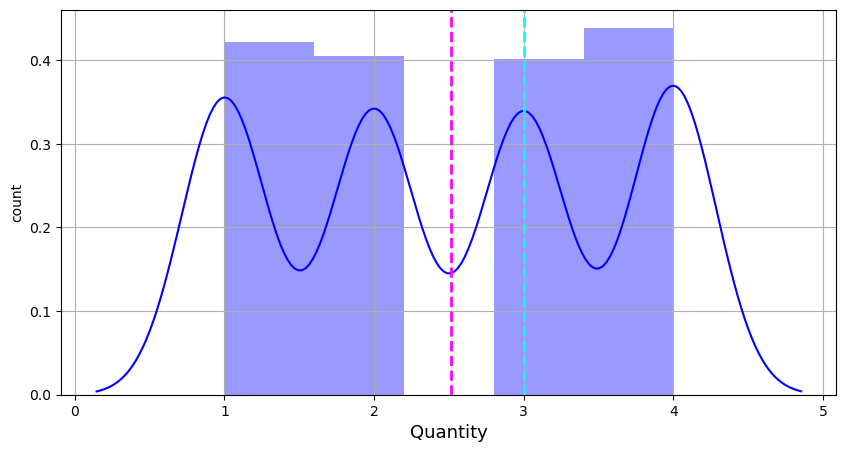

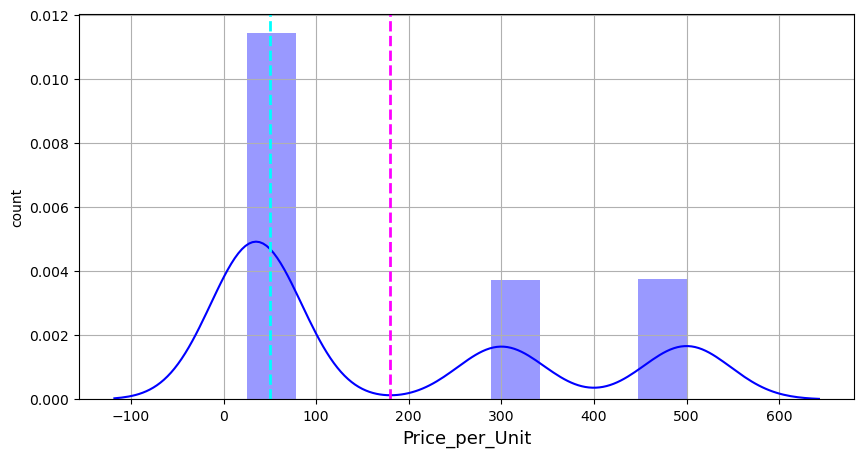

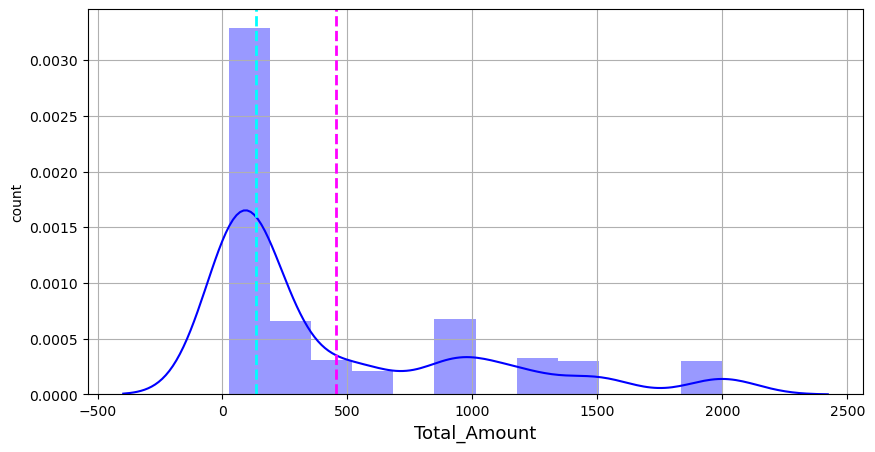

In [132]:
for col in df.select_dtypes('int').columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col], color='blue')
    
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth = 2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth = 2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()    

### Quantity Sold by Product Category

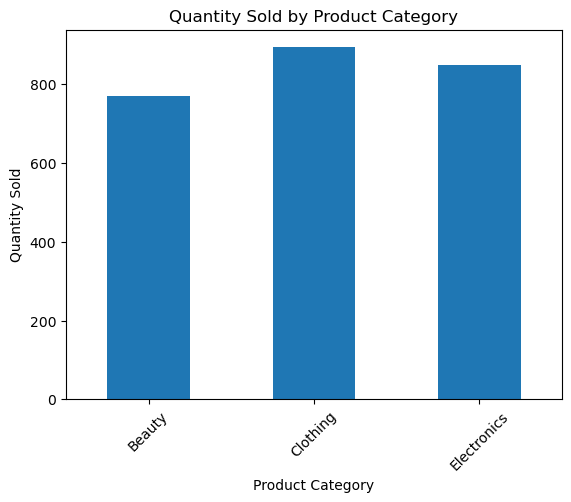

In [133]:
df.groupby('Product_Category')['Quantity'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

Clothing has the highest sales count among the provided product categories, with 894 units sold.

Electronics and Beauty follow closely behind, with 849 and 771 units sold, respectively.

Clothing seems to be the most popular category among customers, indicating its potential as a key revenue driver for the retail business.

The retail business may want to focus on promoting Clothing products and optimizing their sales strategies in this category to maximize revenue.

### Sales Distribution in Each Product Category by Gender

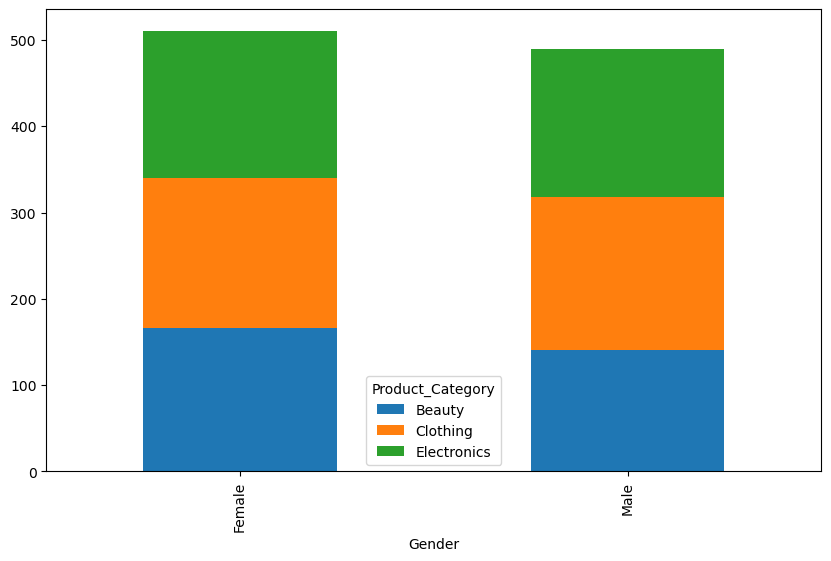

In [134]:
df.groupby(['Gender','Product_Category'])['Customer_ID'].count().unstack().plot(kind='bar',stacked=True,figsize=(10,6));

Both genders seem to have relatively similar sales counts across different product categories, indicating a balanced distribution of purchases.

Potential Marketing Insights: Retailers can use this information to tailor marketing strategies and promotional campaigns targeted towards specific product categories to attract more customers or 
                              increase sales in certain areas.

### Age Distribution of Store Customers

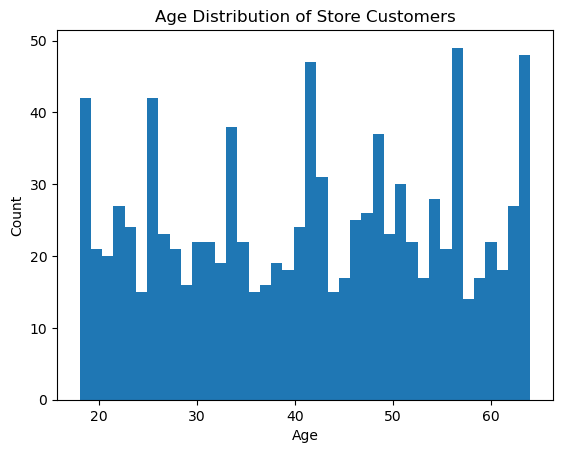

In [135]:
df['Age'].plot(kind='hist', bins=40, title='Age Distribution of Store Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Customers ranged from 18-64 years old (mean age 41.39 years old)
Most sales are from over 41 years old.

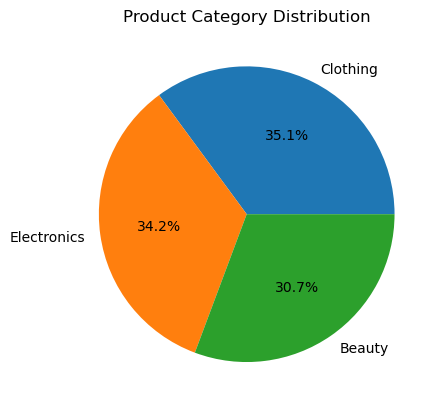

In [136]:
category_counts = df['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')
plt.ylabel(None)
plt.show()

In summary, the balanced distribution across the three main product categories indicates the retailer has a diverse product mix not over-reliant on any one segment. 

Maintaining this balance while maximizing sales in each category would be recommended based on this analysis.

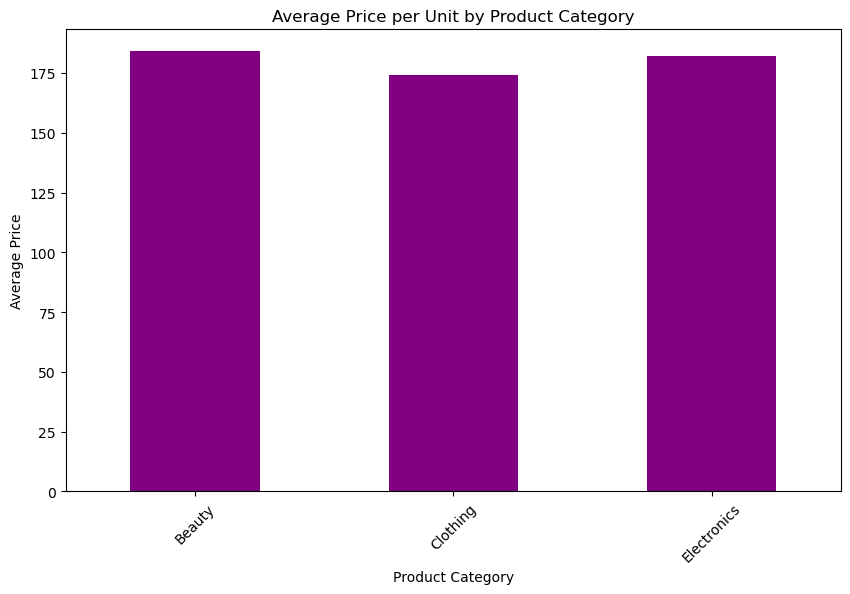

In [137]:
plt.figure(figsize=(10, 6))
df.groupby('Product_Category')['Price_per_Unit'].mean().plot(kind='bar', color='Purple')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The Beauty category has the highest average sales value, followed closely by Electronics and then Clothing.

This suggests that Beauty products might be performing exceptionally well in terms of sales, potentially indicating higher demand or popularity among customers compared to Clothing and Electronics categories. 

Retailers may consider allocating more resources or focusing marketing efforts on the Beauty category to capitalize on its strong performance.

### Sales Trend Overtime

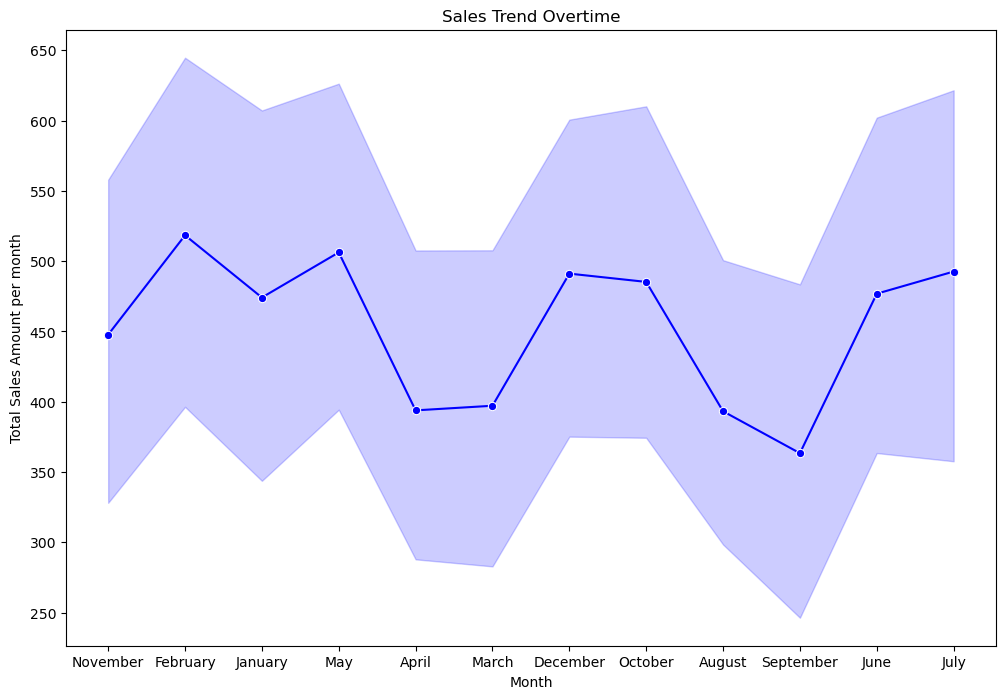

In [138]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df1.Month, y=df1['Total_Amount'],marker='o', color='b', linestyle='-')
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()

The graph shows that the retail sales trend over time is fluctuating, with no clear pattern of consistent increase or decrease. The sales vary by month, but the order of the months on the x-axis is not chronological, which makes it difficult to compare the sales across different seasons or periods. The y-axis is not visible, so the actual values or scale of the sales are unknown. 

Therefore, the graph does not provide enough information to draw any meaningful conclusions about the retail sales analysis.

### Transaction Frequency Over Months

In [139]:
df1['Num_Month'] = df1['Date'].dt.month

In [140]:
transaction_count = df1.groupby('Num_Month')['Transaction_ID'].count()
transaction_count

Num_Month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction_ID, dtype: int64

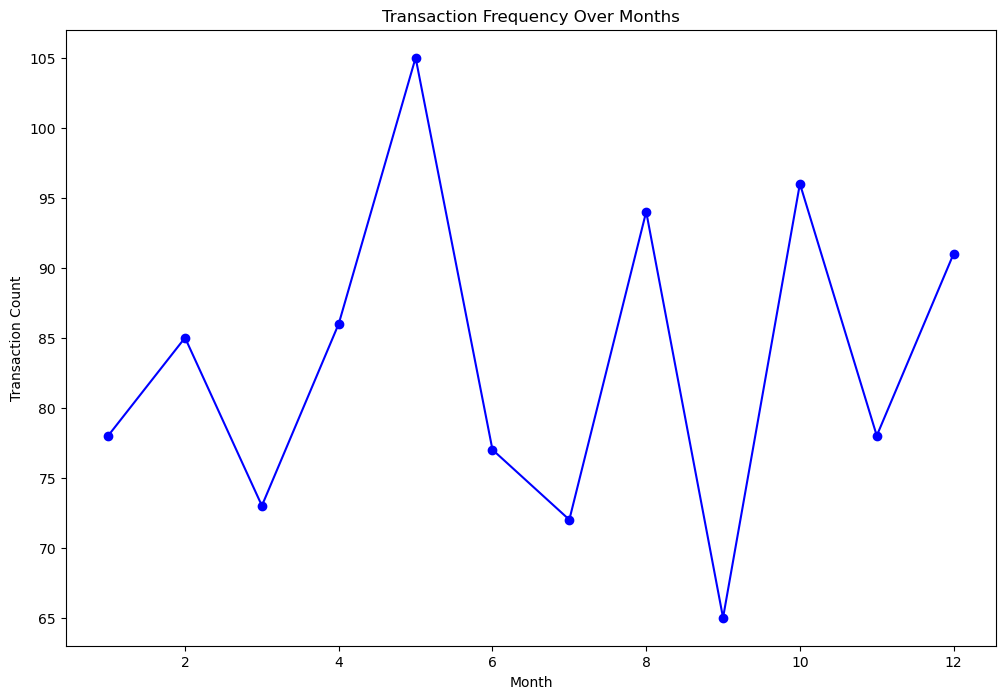

In [141]:
plt.figure(figsize=(12,8))
df1.groupby('Num_Month')['Transaction_ID'].count().plot(kind='line',marker='o', color='b', linestyle='-')
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

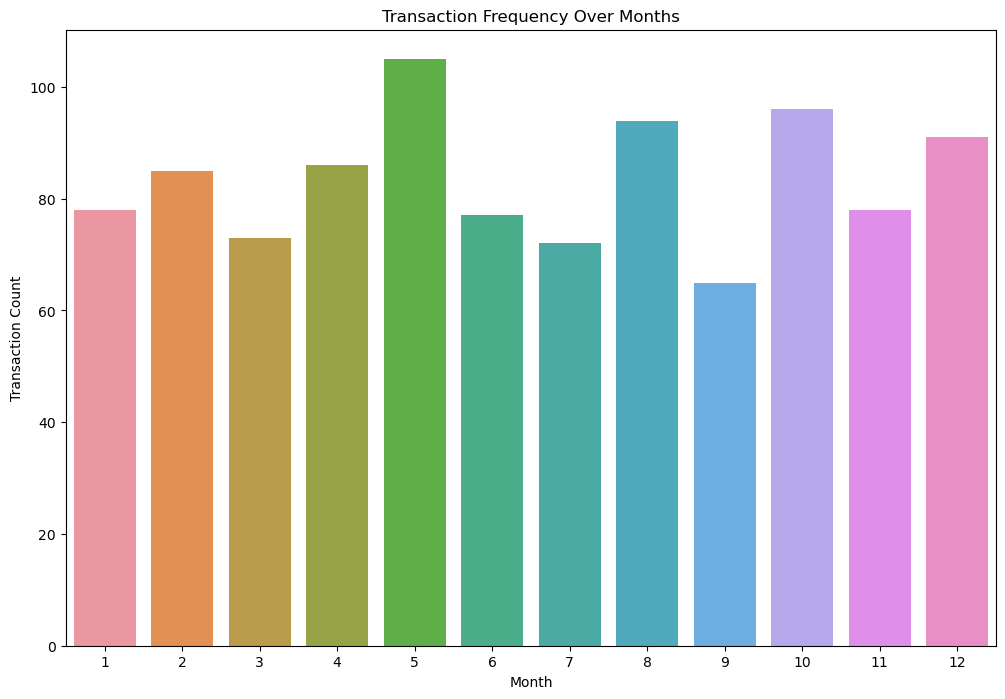

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

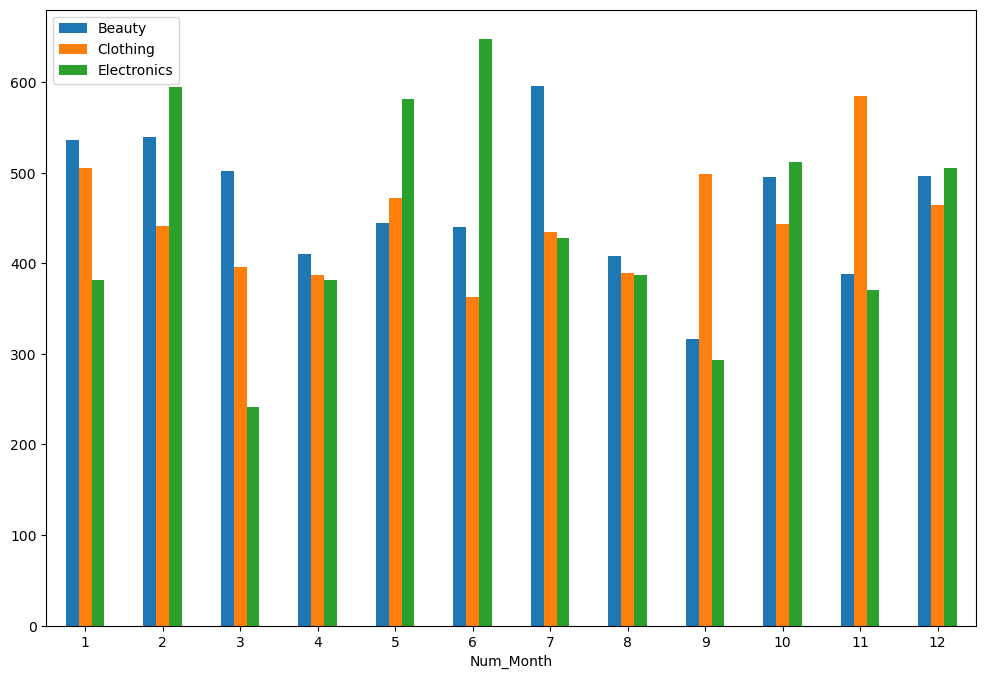

In [143]:
sales_per_cat = df1.pivot_table(index='Num_Month', columns='Product_Category', values='Total_Amount')
sales_per_cat.plot(kind='bar',figsize=(12,8));
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

Analyzing product quantity purchased by diffrent Age Group

In [144]:
# Dividing Age Group
age_bins = [0,18,25,35,50,100]
age_group = ['0-18','19-25','26-35','36-50','50+']
df1['Age_Group'] = pd.cut(df1['Age'], bins = age_bins, labels = age_group)
df1.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month,Num_Month,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,2023,November,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2023,February,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,2023,January,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,2023,May,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,06,2023,May,5,26-35


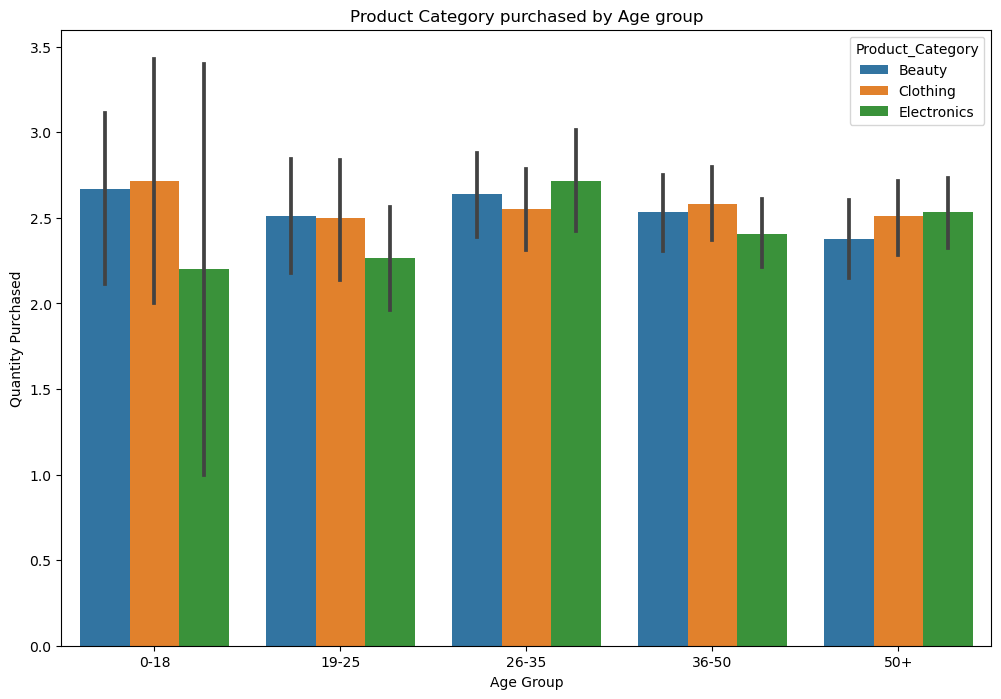

In [145]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age_Group', y='Quantity', hue='Product_Category', data= df1)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

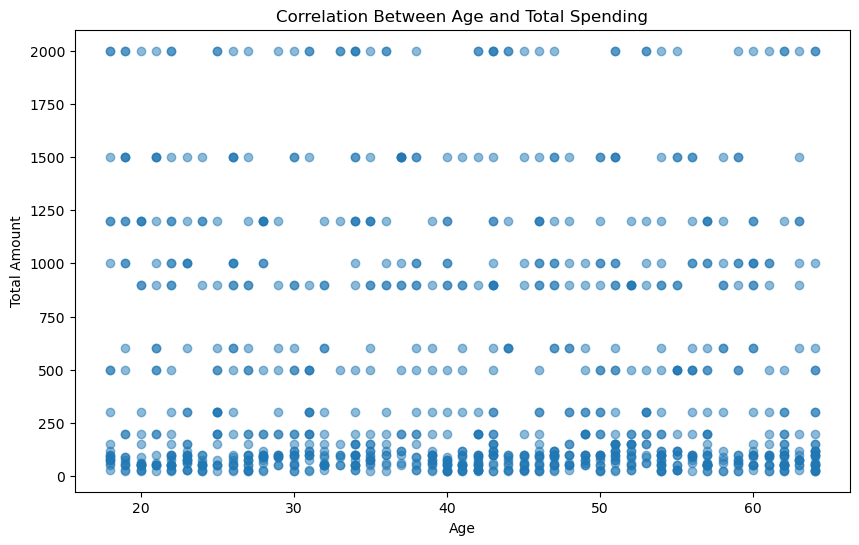

In [173]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Total_Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Correlation Between Age and Total Spending')
plt.show()

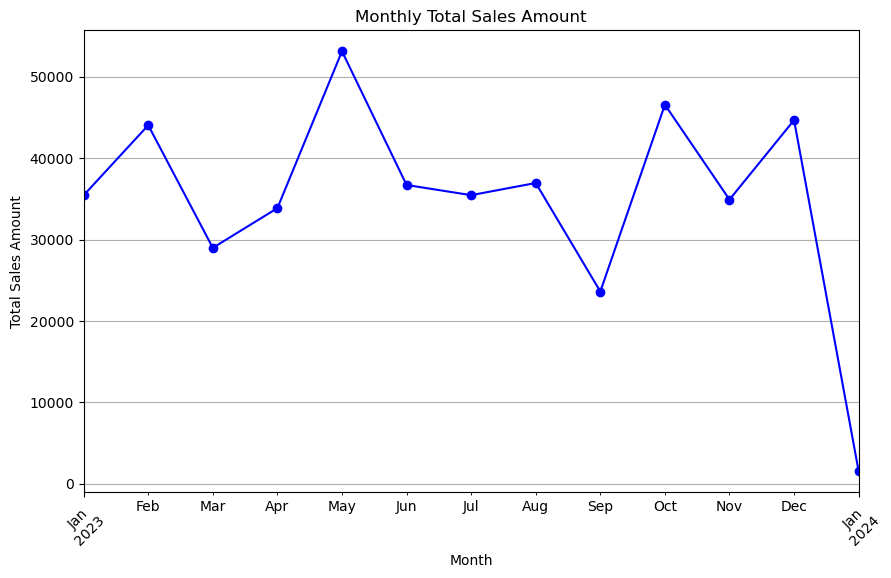

In [149]:
monthly_sales = df1.groupby(df1['Date'].dt.to_period('M'))['Total_Amount'].sum()

# Plot the time series data
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [150]:
df1['DayName'] = df1['Date'].dt.day_name()

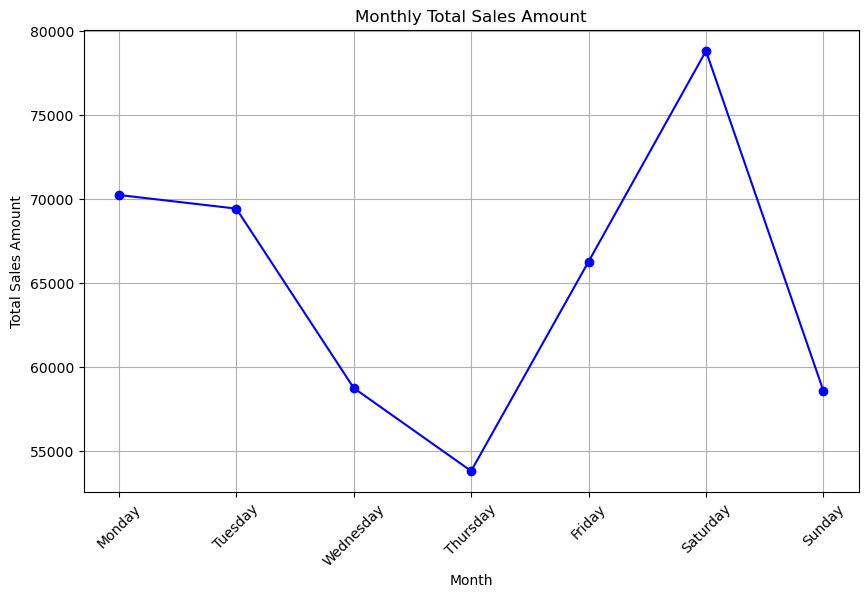

In [157]:
daily_sales = df1.groupby(df1['DayName'])['Total_Amount'].sum()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_of_week)
# Plot the time series data
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [159]:
df2 = df1.copy()

In [163]:
df2.set_index('Date',inplace=True)

In [164]:
df2.head(2)

,Transaction_ID,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month,Num_Month,Age_Group,DayName
Date,,,,,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,24,2023,November,11,26-35,Friday
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,27,2023,February,2,26-35,Monday


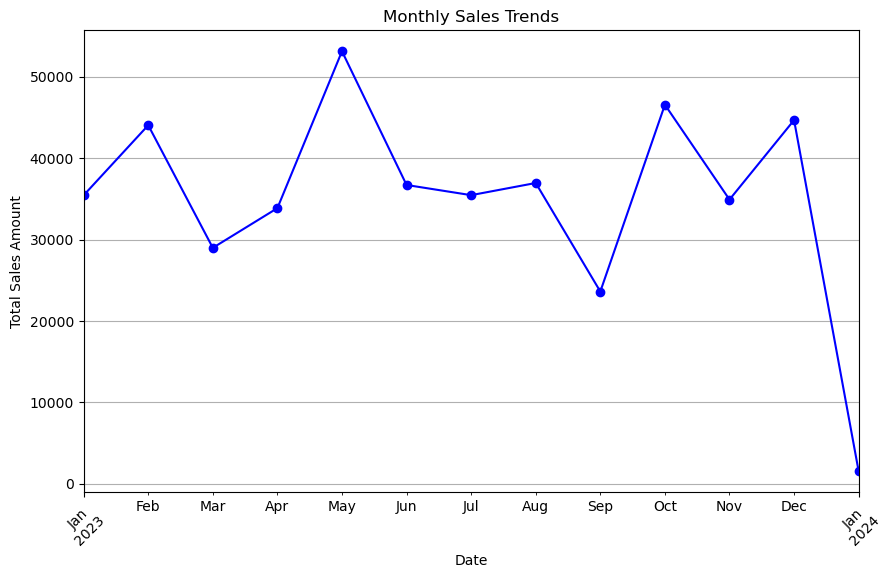

In [166]:
monthly_sales = df2['Total_Amount'].resample('M').sum()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Conclusion

The dataset captures 1000 transactions from a retail sales database, with transactions numbered sequentially from 1 to 1000.

Clothing has the highest sales count among the provided product categories, with 894 units sold.Electronics and Beauty follow closely behind, with 849 and 771 units sold, respectively

There's a varied sales performance across different age groups. The age group that stands out in the provided data is 19 years old, with sales amounting to $14,870. Tailoring marketing strategies to target the most profitable age groups, while also exploring opportunities in age segments that are currently underperforming, could optimize sales.

The customer ages range from 18 to 64 years, with an average age of around 41 years, indicating a middle-aged customer base.

The products sold fall into three categories: Clothing, Electronics, and Beauty, suggesting a diverse product offering in the retail store.

The quantity of products per transaction varies from 1 to 4, with an average of about 2.5, indicating that the majority of transactions involve the purchase of multiple items.

The price per unit of products ranges significantly from 25 to 500, with an average price of $179.89, which may point to a combination of both low-cost and premium products.

The total amount spent per transaction has a wide range, from 25 to 2000, with an average of $456, suggesting that the store attracts both small-scale and substantial purchases.

The possible insight could be that older customers prefer purchasing clothing items due to long-established buying habits, the diverse products catered towards older demographics, or comfort value. This might explain why the average age for the Clothing category is higher.

Collectively, these insights indicate a retail operation with a diverse customer demographic and product range, serving both budget-conscious and premium market segments, and experiencing a varied range of transaction volumes and values.

### Recommendations

Focus marketing efforts on the Clothing category as it shows consistent popularity across all age groups and genders, and also features as the second-highest revenue generator.

Enhance the Electronics product range or marketing, to capitalize on its position as the top revenue generator.

Investigate opportunities to increase Beauty product sales, maybe by targeting the age groups that show less interest or by strategic marketing to males.

Explore promotional activities or special offers in February and May when sales trends are high, and consider strategies to boost sales in the low-performing months like March.

Prioritize stocking and promoting Electronics and Beauty products as they are both popular and high revenue-generating categories. Clothing, while popular, generates less revenue compared to Electronics, suggesting a potential for higher profit margins in the latter.

Younger age groups might be more interested in Beauty and Electronics, given their higher purchase counts. Tailor marketing messages to highlight trends, technology, and innovation

Increase stock levels and marketing efforts during months with historically higher sales (e.g., holiday seasons or back-to-school periods) to capitalize on increased consumer spending.
Consider promotions or sales during slower months to boost transactions and maintain steady revenue flow.

Continuously monitor sales data and customer feedback to adapt product offerings and marketing strategies. Consumer preferences can shift rapidly, and staying ahead of trends is crucial for sustained success.

By focusing on high-performing product categories, tailoring marketing efforts based on detailed customer insights, and adjusting strategies according to sales trends, businesses can optimize their operations and maximize revenue.